In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Dataset
path = "/content/drive/MyDrive/Dataset/kidney_disease.csv"
df=pd.read_csv(path)
print(df)

In [3]:
#check if dataset loaded
ckd_data.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [4]:
#check information on dataset columns
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj




The dataset selected for the case study is "Chronic kidney disease", collected from UCI machine learning repository(https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease)

This dataset is used to predict the chronic kidney disease which is collected from hospitals for 2 months of period.

This is a Multivariate dataset having 400 instances.
Number of attributes/columns of the dataset are: 25

Target/dependent variable is the 'Class' attribute


Features of the dataset:
age - age
1.   age - age
2.   bp - blood pressure
3.   sg - specific gravity
4.   al - albumin
5.   su - sugar
6.   rbc - red blood cells
7.   pc - pus cell
8.   pcc - pus cell clumps
9.   ba - bacteria
10.  bgr - blood glucose random
11.  bu - blood urea
12.  sc - serum creatinine
13.  sod - sodium
14.  pot - potassium
15.  hemo - hemoglobin
16.  pcv - packed cell volume
17.  wc - white blood cell count
18.  rc - red blood cell count
19.  htn - hypertension
20.  dm - diabetes mellitus
21.  cad - coronary artery disease
22.  appet - appetite
23.  pe - pedal edema
24.  ane - anemia
25.  class - class







In [5]:
# count number of ? in each column
question_mark_count = (ckd_data == '?').sum()

# replace ? with blank value
#ckd_data = ckd_data.replace('?', None)

print(question_mark_count)
print(ckd_data)

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64
      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...    

In [6]:
# Replace non-numeric values with NaN
ckd_data[['pcv', 'wc', 'rc']] = ckd_data[['pcv', 'wc', 'rc']].replace({'?': np.nan})

# Convert columns to numeric data types
ckd_data[['pcv', 'wc', 'rc']] = ckd_data[['pcv', 'wc', 'rc']].apply(pd.to_numeric, errors='coerce')

# Print the modified dataset
print(ckd_data)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  44.0  7800.0  5.2  yes  yes   no   good   no   no 

In the above code we have converted converted columns having numeric values but were displayed as object dtype into numeric data type.
Next we check the null values for each column. We will impute missing values for numerical columns by first plotting their distribution, by this we are also performing data exploration/visualisation

In [7]:
#check if columns data type is changed
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [8]:
#check null values of the dataset
ckd_data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
#separate numerical and categorical columns
def separate_numerical_categorical_columns(df):
    numerical_cols = []
    categorical_cols = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numerical_cols.append(col)
        else:
            categorical_cols.append(col)
    return numerical_cols, categorical_cols

In [10]:
#get separate columns
numerical_cols, categorical_cols = separate_numerical_categorical_columns(ckd_data)

# print the results
print('Numerical columns:', numerical_cols)
print('Categorical columns:', categorical_cols)

Numerical columns: ['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
Categorical columns: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [11]:
#check summary statistics for numerical columns
ckd_data.describe()

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  \
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000   
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437   
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587   
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000   
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000   
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000   
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000   
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000   

              pcv            wc          rc  
count  329.000000    294.000000  269.000000  
mean    38.884498   8406.122449    4.707435  
std      8.990105   2944.474190    1.025323  
min      9.000000   2200.000000    2.100000  
25%     32.000000   6500.000000    3.900000  
50%     40.000000   8000.000000    4.800000  
75%     45.000000   9800.000000    5.400000  
max     54.000000  26400.000000    8.000000

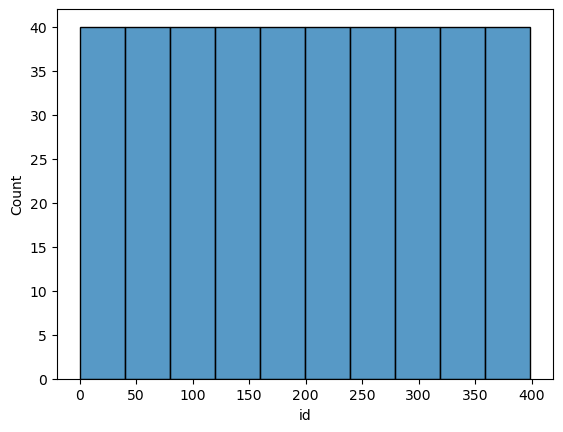

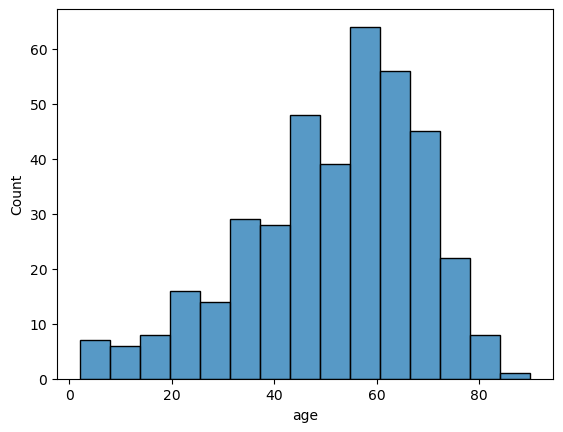

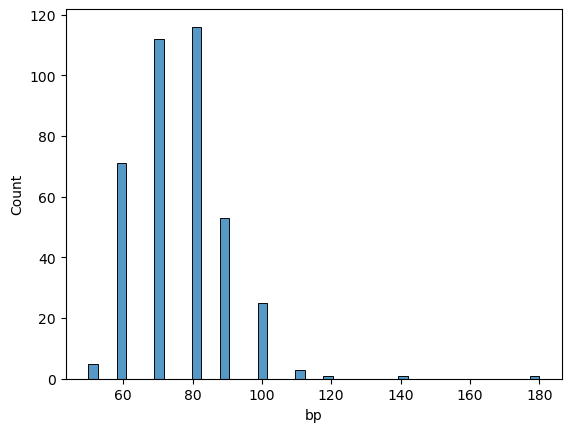

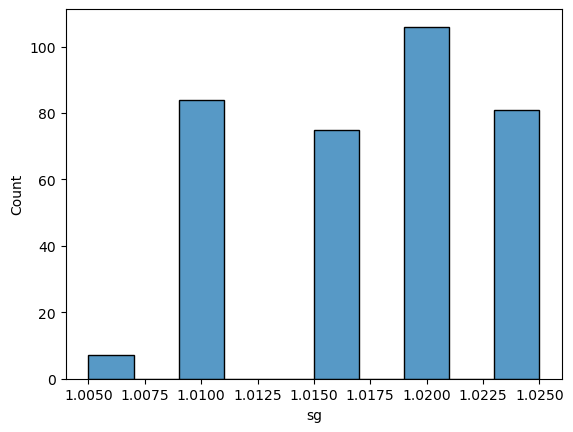

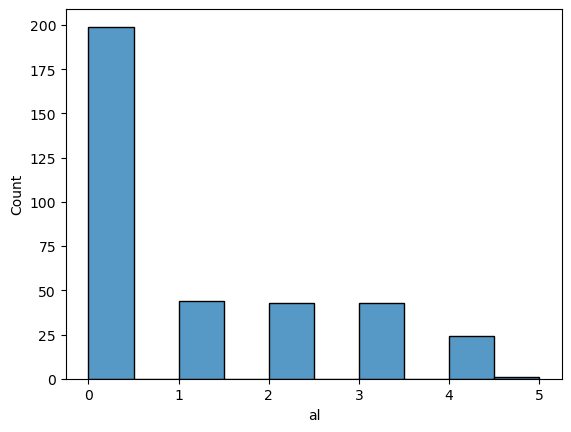

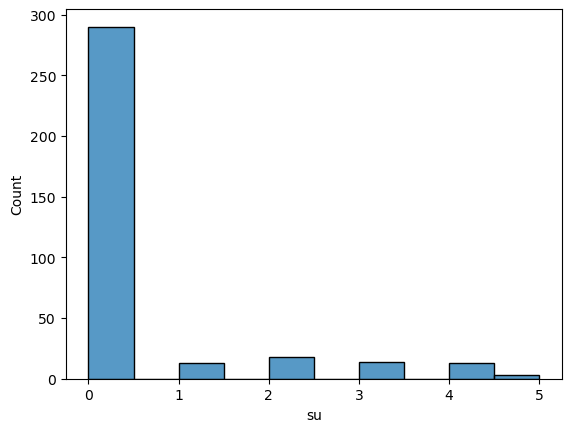

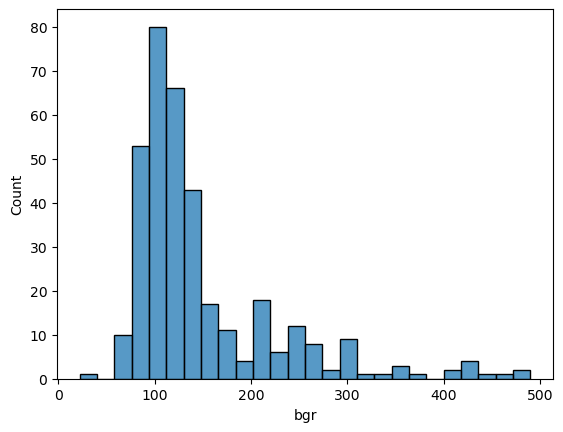

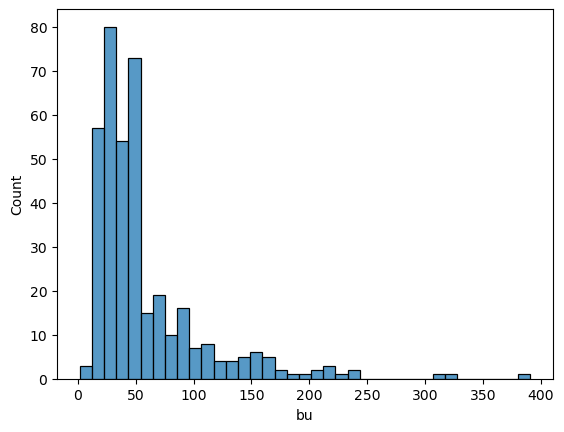

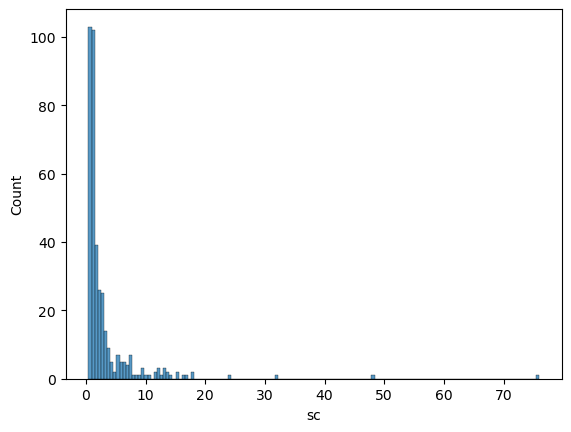

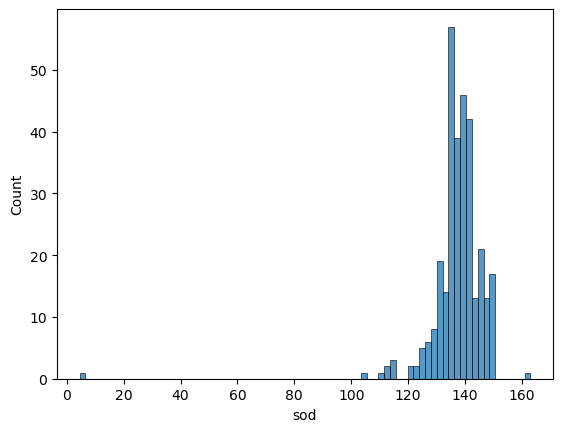

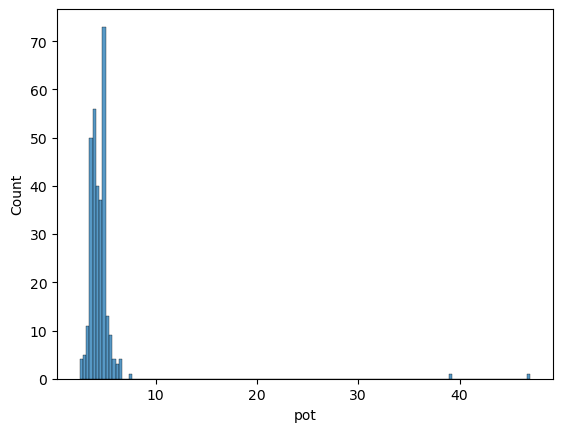

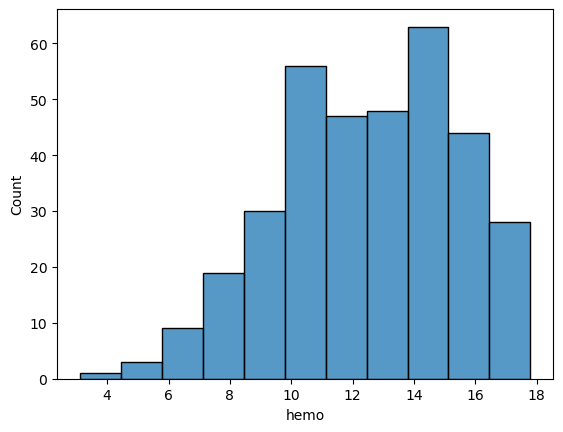

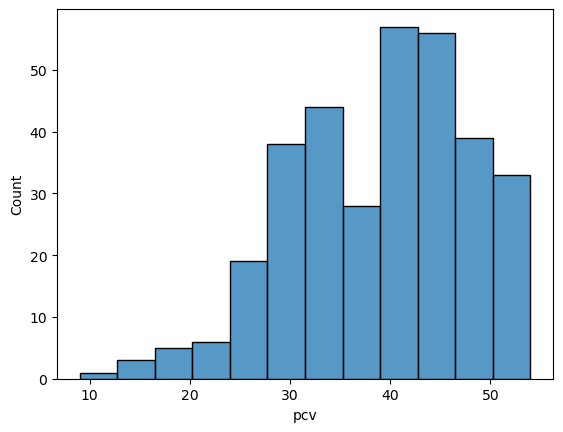

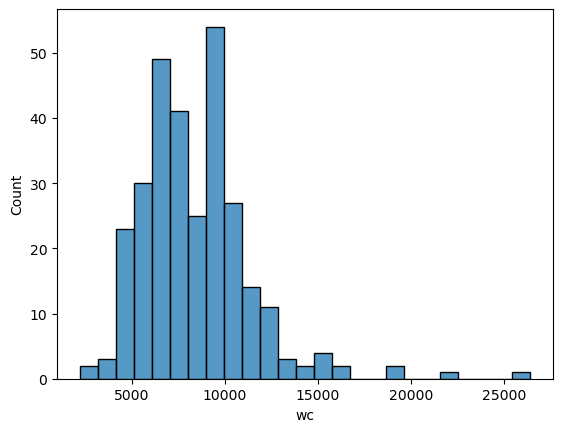

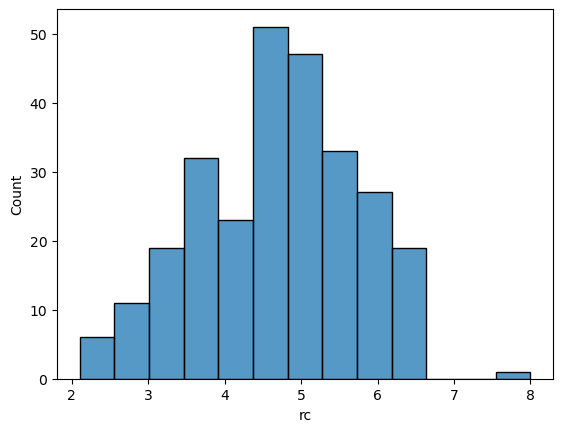

In [12]:
#check distribution of numerical columns by plotting histogram for numerical columns
for col in numerical_cols:
 plt.figure()
 sns.histplot(ckd_data[col])
 plt.xlabel(col)
 plt.show()


From the above histograms plotted for all the muerical columns it can be said that almost all these columns have a normal distribution. Columns SG, AL, and SU do not have any distribution as such.

Since numerical columns have a normal distribution, we will impute their missing values using mean for those columns

In [13]:
#replace missing values for age column with mean
ckd_data['age'].fillna(ckd_data['age'].mean(), inplace=True)

#replace missing values for BP column with median
ckd_data['bp'].fillna(ckd_data['bp'].median(), inplace=True)

#replace missing values for SG column with mean
ckd_data['sg'].fillna(ckd_data['sg'].mean(), inplace=True)

#replace missing values for AL column with mean
ckd_data['al'].fillna(ckd_data['al'].mean(), inplace=True)

#replace missing values for SU column with mean
ckd_data['su'].fillna(ckd_data['su'].mean(), inplace=True)

In [14]:
#replace missing values for SU column with mean
ckd_data['bgr'].fillna(ckd_data['bgr'].mean(), inplace=True)

#replace missing values for SU column with mean
ckd_data['bu'].fillna(ckd_data['bu'].mean(), inplace=True)

#replace missing values for SU column with mean
ckd_data['sc'].fillna(ckd_data['sc'].mean(), inplace=True)

#replace missing values for SU column with mean
ckd_data['sod'].fillna(ckd_data['sod'].mean(), inplace=True)

#replace missing values for SU column with mean
ckd_data['pot'].fillna(ckd_data['pot'].mean(), inplace=True)

#replace missing values for SU column with mean
ckd_data['hemo'].fillna(ckd_data['hemo'].mean(), inplace=True)

#replace missing values for SU column with mean
ckd_data['pcv'].fillna(ckd_data['pcv'].mean(), inplace=True)

#replace missing values for SU column with mean
ckd_data['wc'].fillna(ckd_data['wc'].mean(), inplace=True)

#replace missing values for SU column with mean
ckd_data['rc'].fillna(ckd_data['rc'].mean(), inplace=True)




In [15]:
#check null values of the dataset
ckd_data.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

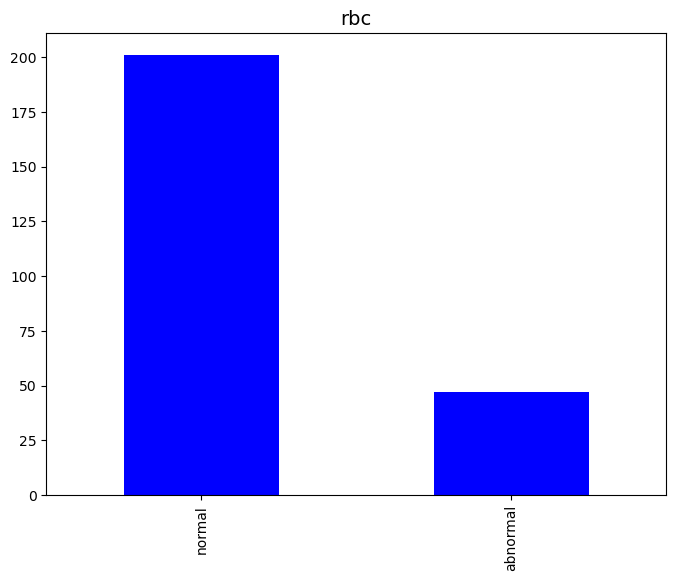

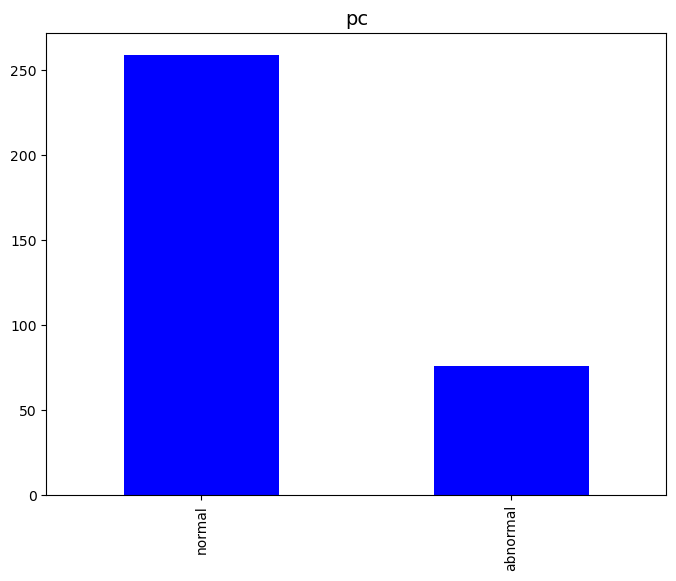

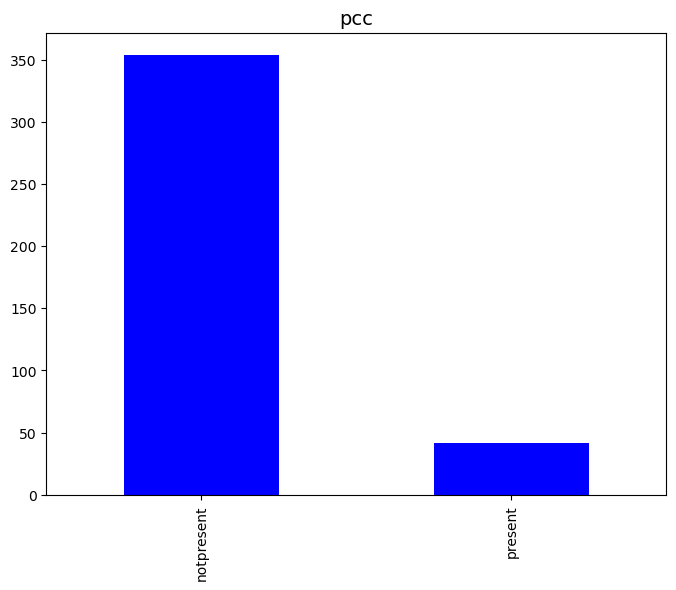

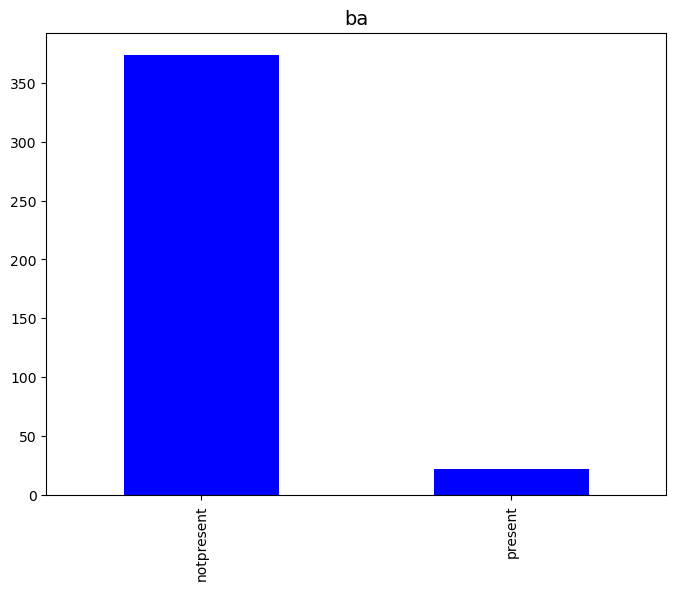

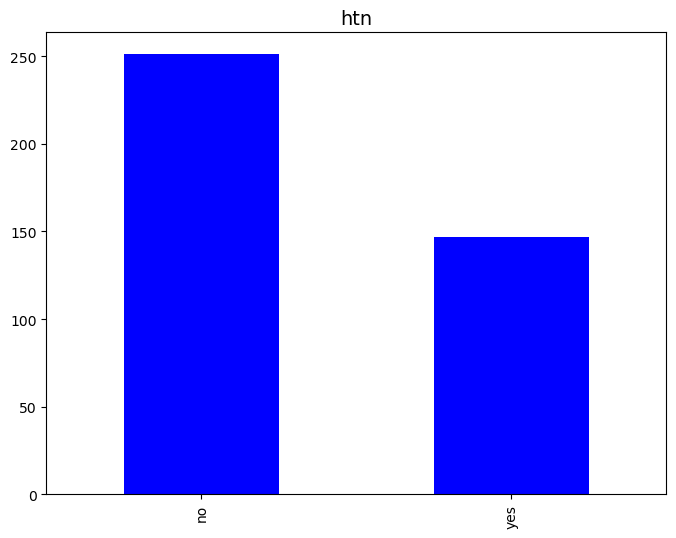

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


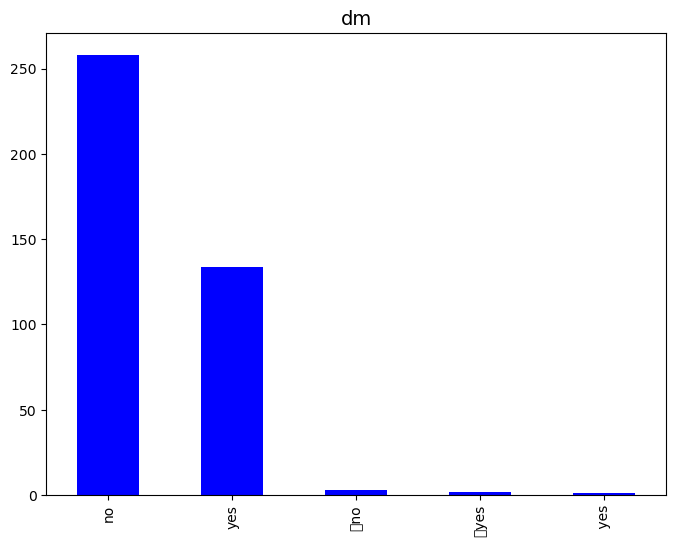

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


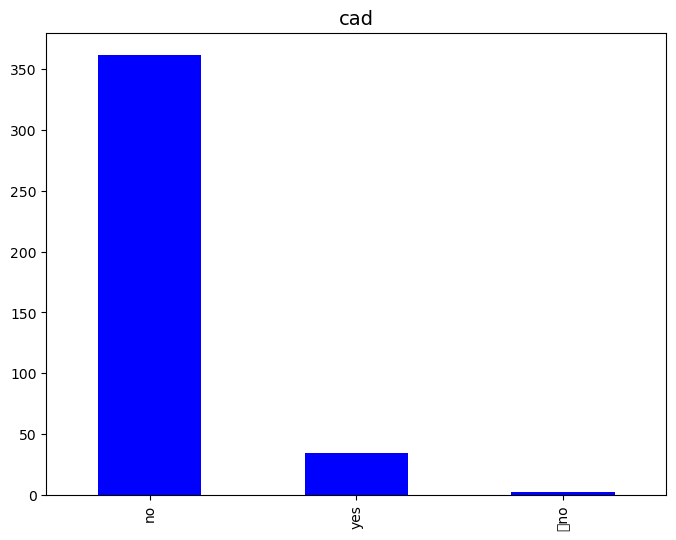

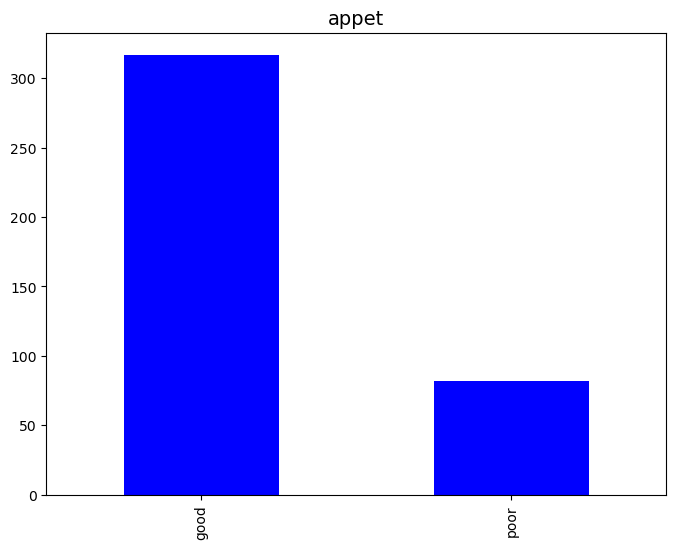

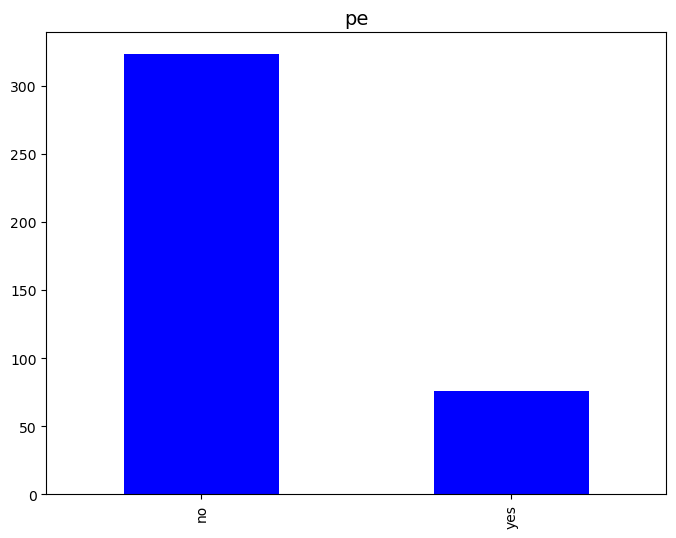

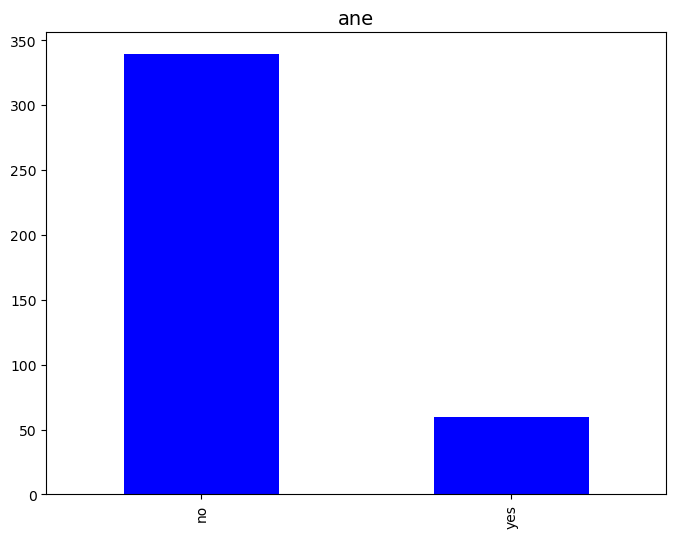

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


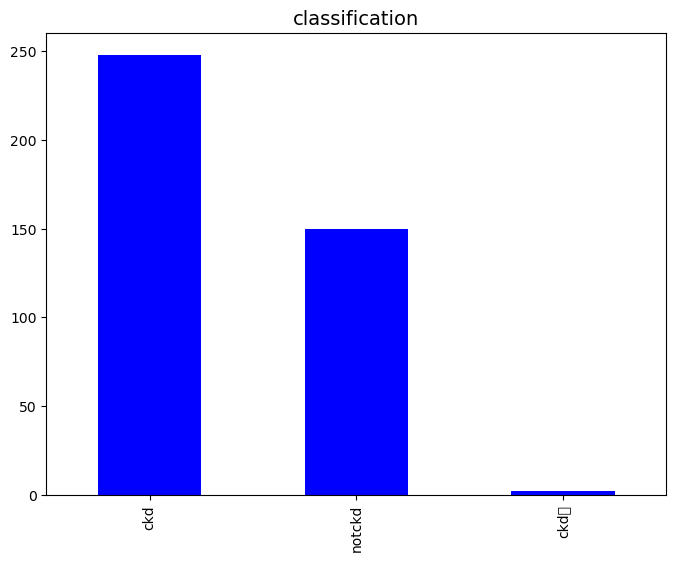

In [16]:
#*plotting bar plot for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    ckd_data[col].value_counts().plot(kind='bar', color='blue')
    plt.title(col, fontsize=14)
    plt.show()

The above graphs displays the count of each value in these categorical columns.

We then impute missing value for categorical columns using the most common value(mode) from these respective columns

In [17]:
# Loop through the categorical columns and print value counts
for column in categorical_cols:
    value_counts = ckd_data[column].value_counts()
    print(f'Value counts for {column}:\n{value_counts}\n')

Value counts for rbc:
normal      201
abnormal     47
Name: rbc, dtype: int64

Value counts for pc:
normal      259
abnormal     76
Name: pc, dtype: int64

Value counts for pcc:
notpresent    354
present        42
Name: pcc, dtype: int64

Value counts for ba:
notpresent    374
present        22
Name: ba, dtype: int64

Value counts for htn:
no     251
yes    147
Name: htn, dtype: int64

Value counts for dm:
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

Value counts for cad:
no      362
yes      34
\tno      2
Name: cad, dtype: int64

Value counts for appet:
good    317
poor     82
Name: appet, dtype: int64

Value counts for pe:
no     323
yes     76
Name: pe, dtype: int64

Value counts for ane:
no     339
yes     60
Name: ane, dtype: int64

Value counts for classification:
ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64



In [18]:
#replace missing value in categorical columns with mode of those columns
for col in categorical_cols:
    most_common_value = ckd_data[col].mode()[0]
    ckd_data[col].fillna(most_common_value, inplace=True)

In [19]:
#again check for null values
ckd_data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [20]:
# check for duplicate values
duplicate_rows = ckd_data[ckd_data.duplicated()]

# print out the duplicate rows
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [21]:
# define a function to detect outliers
def detect_outliers(data, col):
    # calculate the interquartile range (IQR)
    q1, q3 = np.percentile(data[col], [25, 75])
    iqr = q3 - q1

    # calculate the upper and lower bounds
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    # detect outliers
    outliers = data[(data[col] > upper_bound) | (data[col] < lower_bound)]

    return outliers

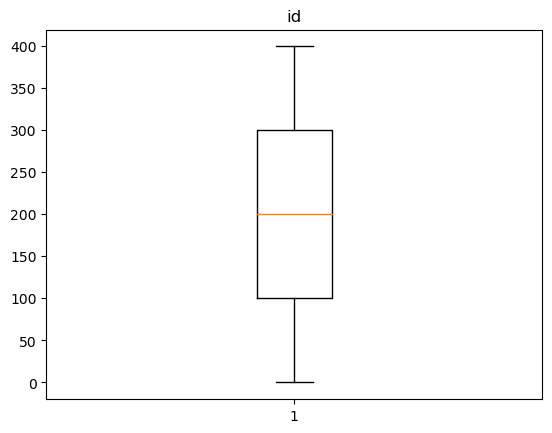

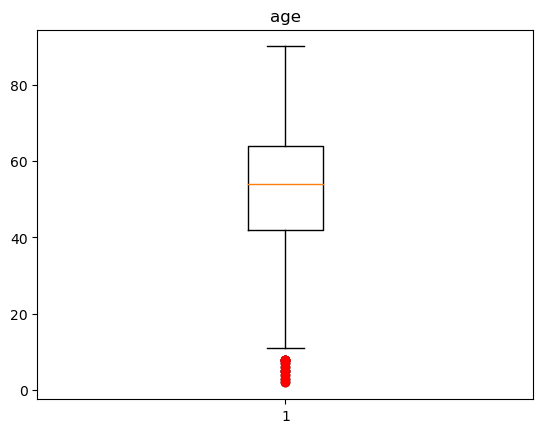

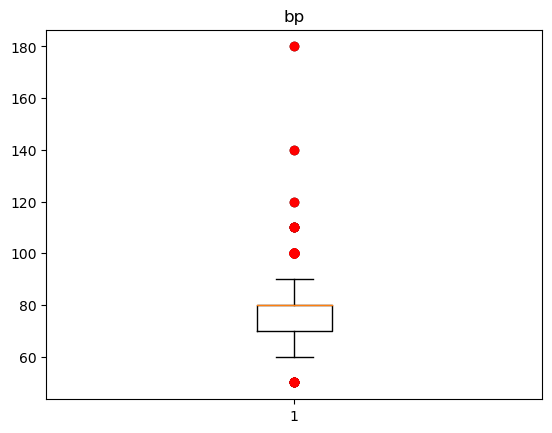

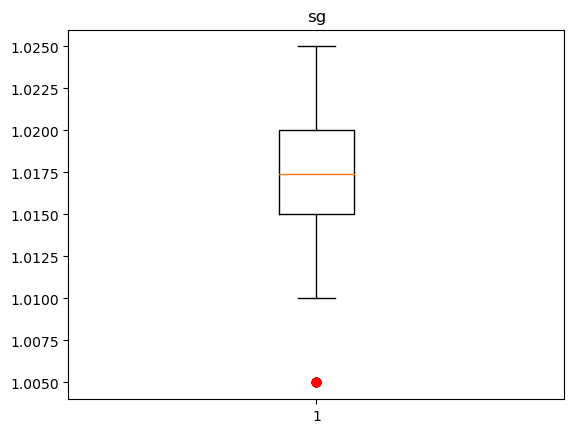

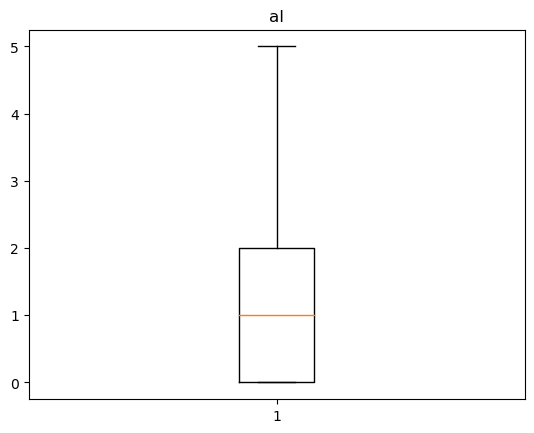

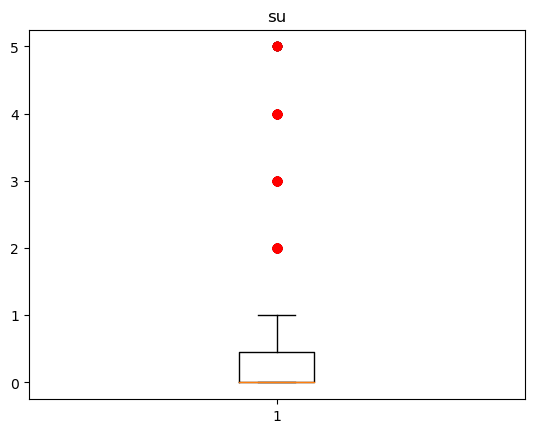

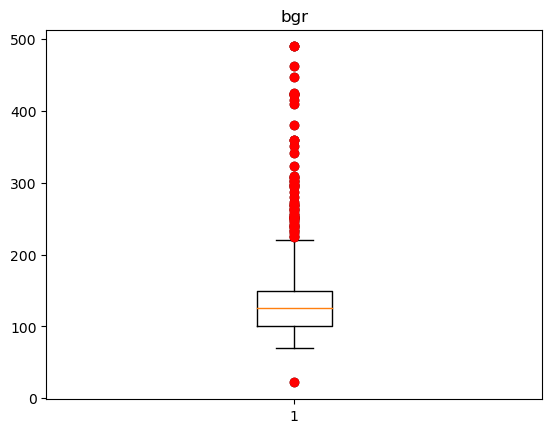

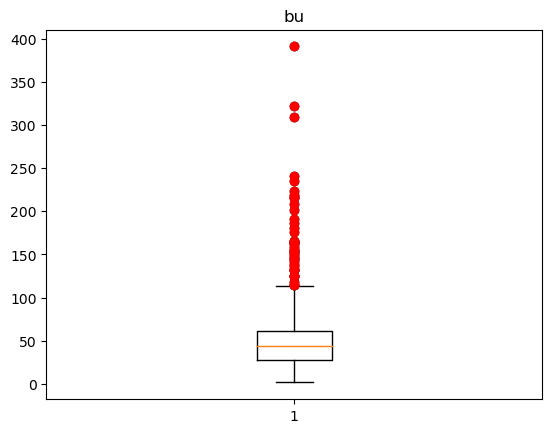

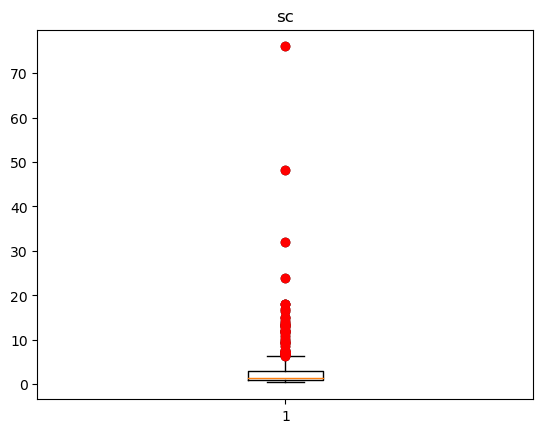

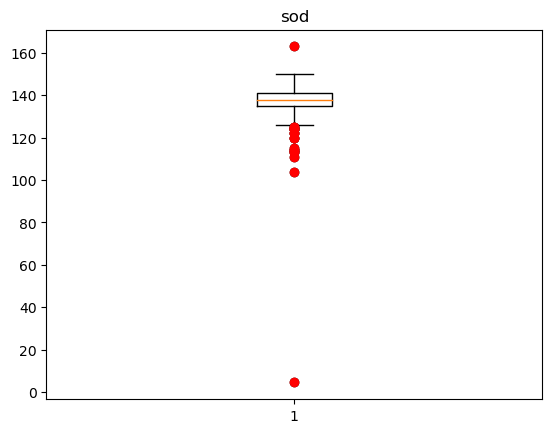

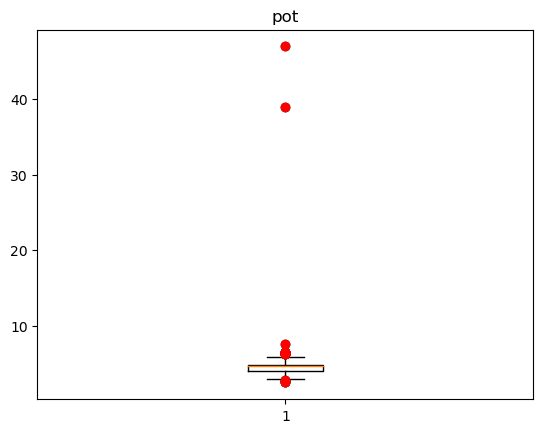

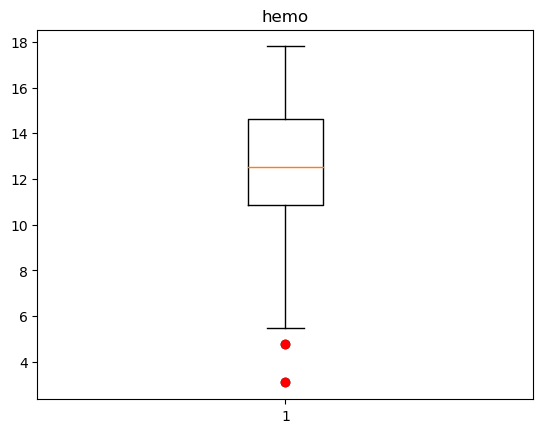

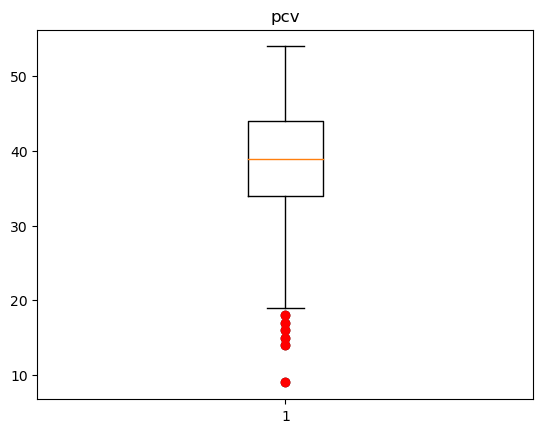

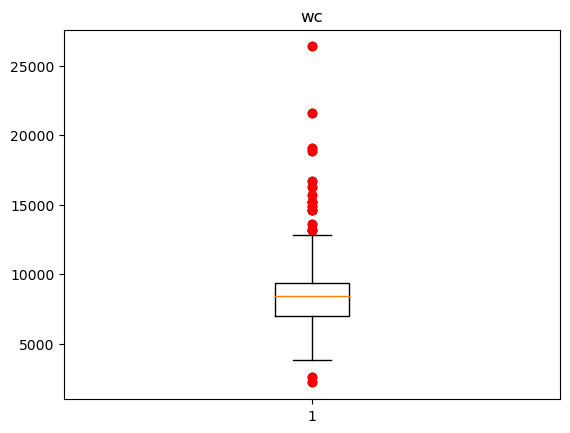

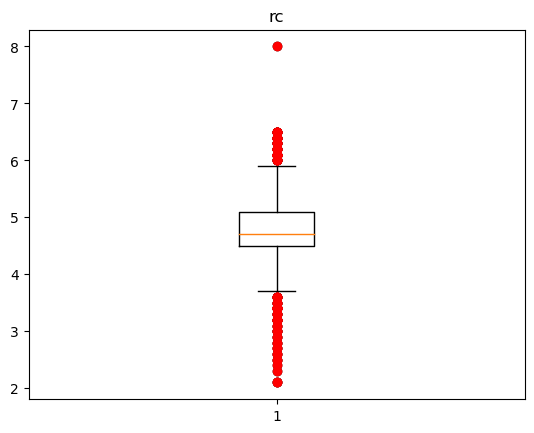

In [22]:
# create a boxplot for each numerical column
for col in numerical_cols:
    # detect outliers
    outliers = detect_outliers(ckd_data, col)

    # create the boxplot
    fig, ax = plt.subplots()
    ax.boxplot(ckd_data[col])
    ax.set_title(col)

    # mark the outliers
    for index, row in outliers.iterrows():
        ax.plot(1, row[col], 'ro')

    # show the plot
    plt.show()


Except the SG column, all other numerical columns contain outliers. But I have decided not to impute outliers for this case study

In [23]:
# Define the target variable
target_var = 'classification'

Now we need to visualise how each numerical column affect the Target variable(CLASS).

We will plot scatterplot for CLASS variable with each numerical attribute

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


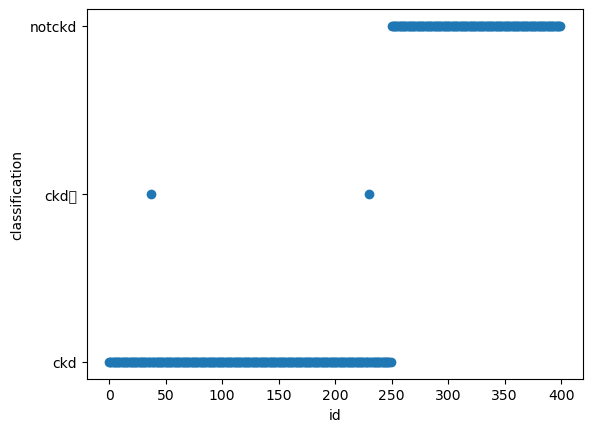

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


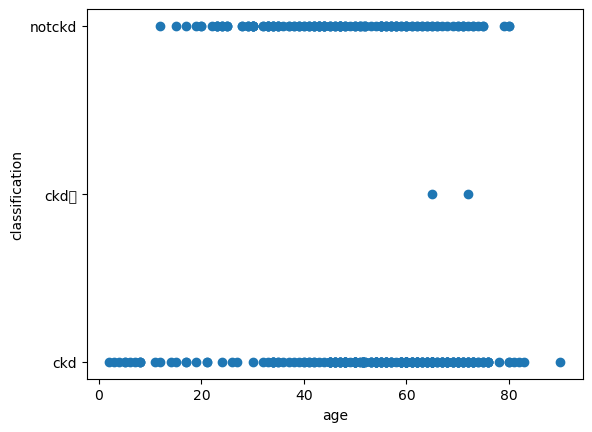

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


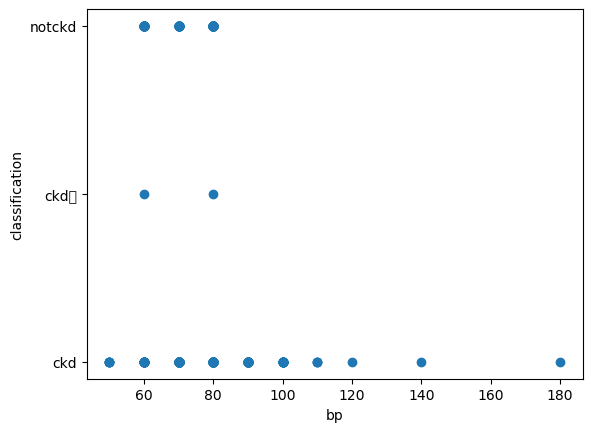

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


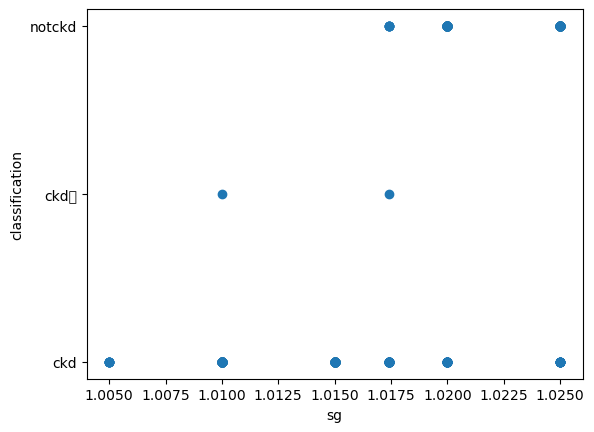

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


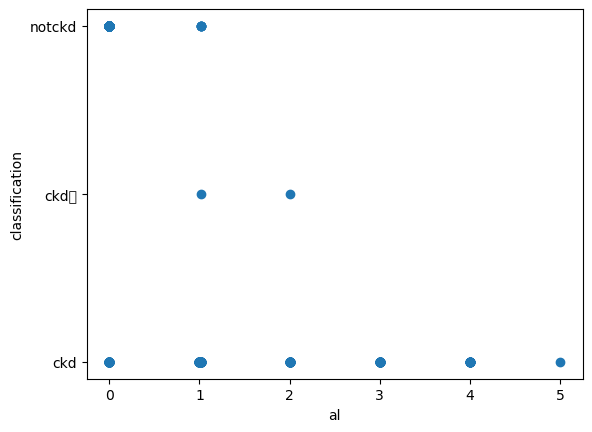

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


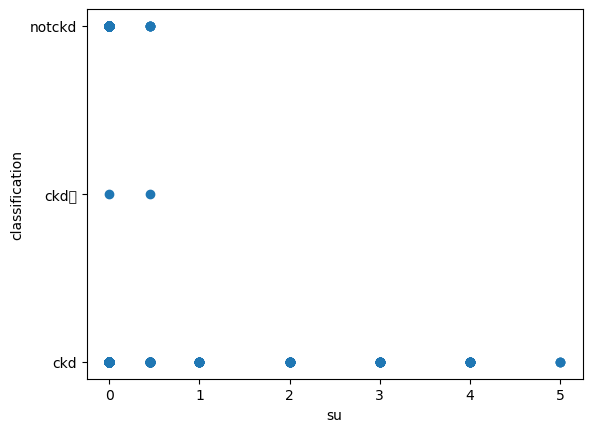

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


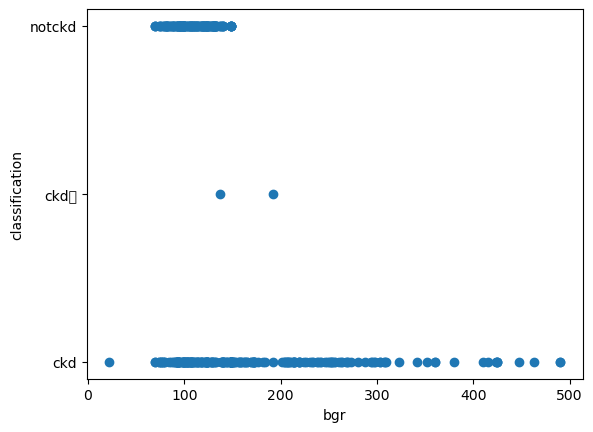

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


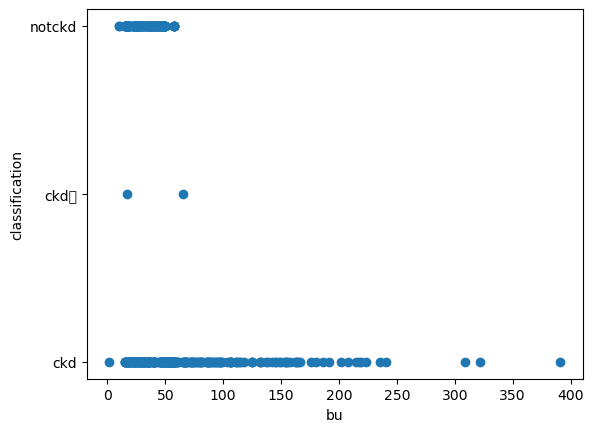

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


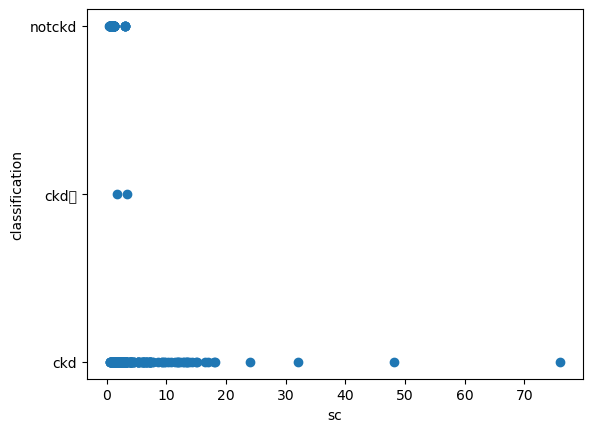

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


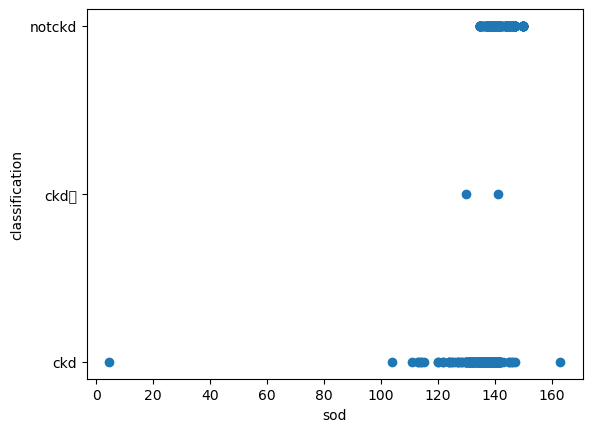

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


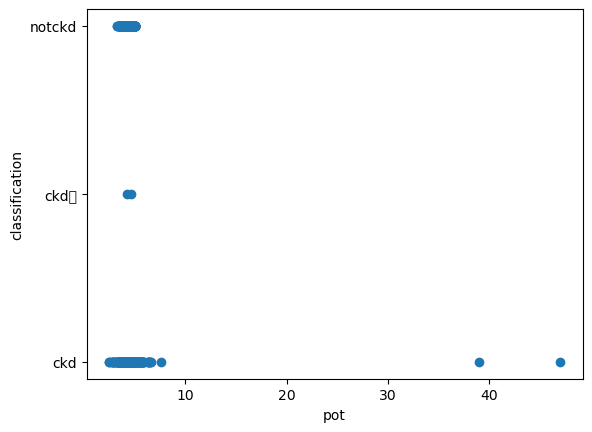

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


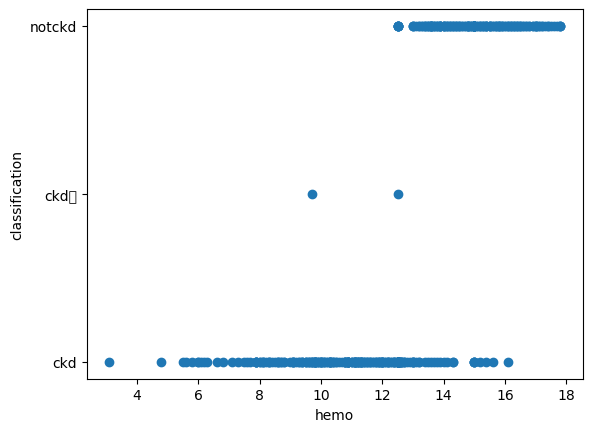

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


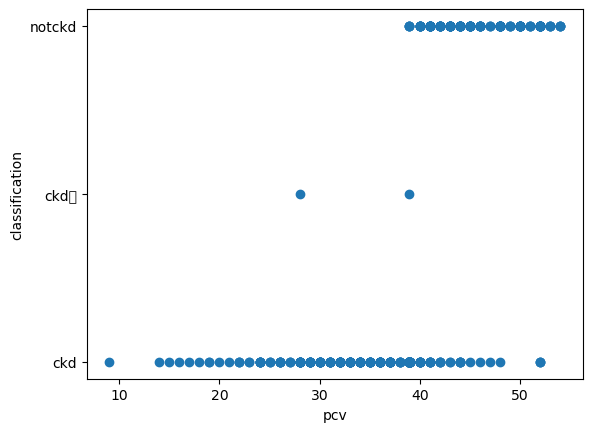

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


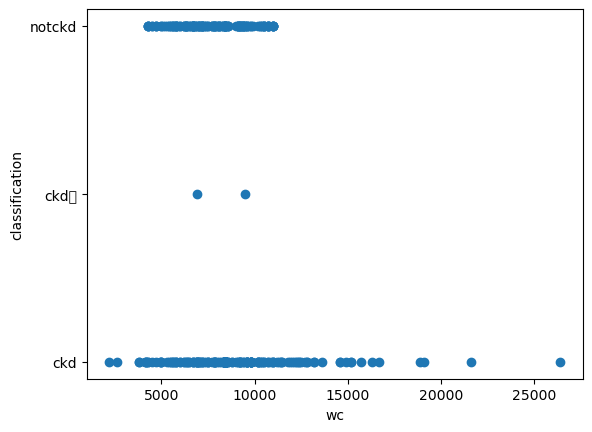

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


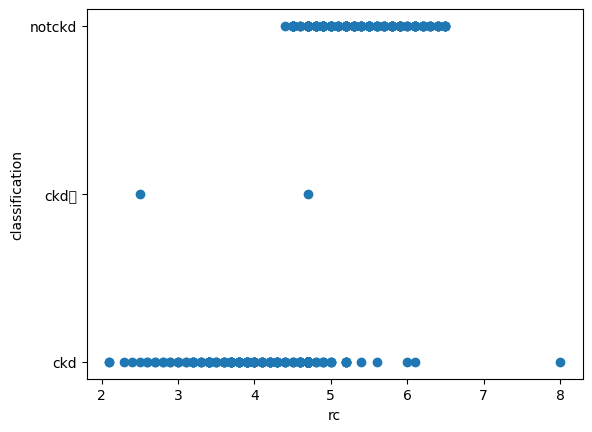

In [24]:
# Create a scatter plot for each numerical column against the target variable
for col in numerical_cols:
    plt.scatter(ckd_data[col], ckd_data[target_var])
    plt.xlabel(col)
    plt.ylabel(target_var)
    plt.show()

From the above scatterplot we can infer the following:
*   Age can lead a person to have CKD, people from every age group are at risk of developing CKD, but people with age 30 and above are more likely to have CKD
*   Low BP values can cause CKD
*   High BGR(Blood Glucose random) value from 100mg and above can cause CKD
*   Low BU(Blood Urea) from 0mg to 250mg/dl causes CKD
*   Low SC(serum creatnine) 0 to 20 mg/dl causes CKD
*   SOD in range 100mg to 150mg can result in having Ckd in a person
*   High HEMO(hemoglobin) 6 to 16mg/dl value can cause CKD
*   High PCV value, can be a sign that the body is making too many red blood cells and can causes CKD
*   Low WBCC and RBCC count can indicate person developing CKD.


In [25]:
# Replace a specific value in 'Column2' with a new value
ckd_data['classification'] = ckd_data['classification'].replace('ckd\t', 'no')

# Print the modified DataFrame
print(ckd_data)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...   pcv      wc        rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  44.0  7800.0  5.200000  yes  yes   no   good 

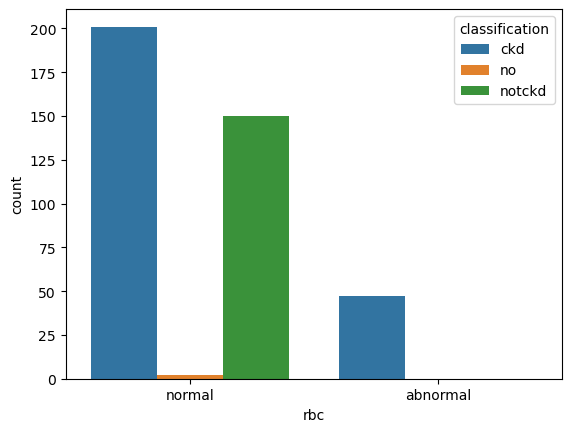

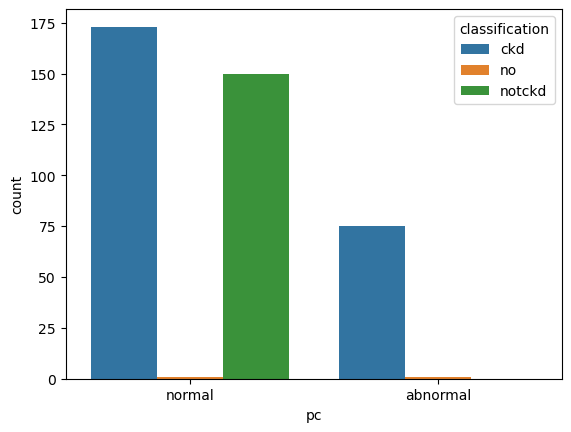

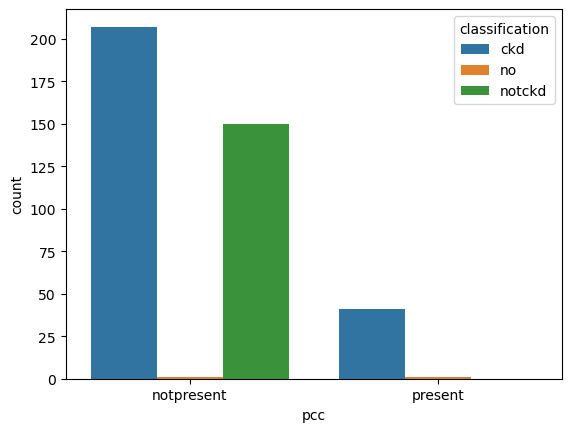

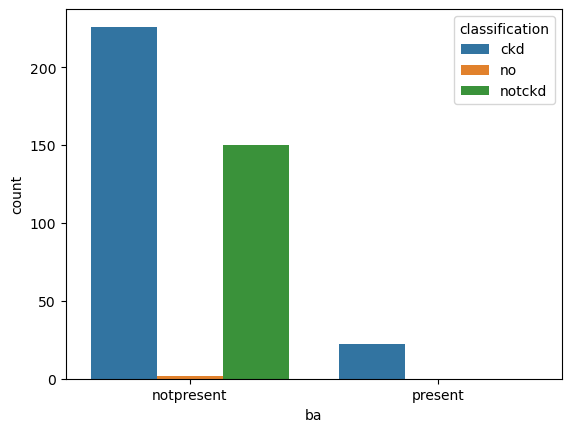

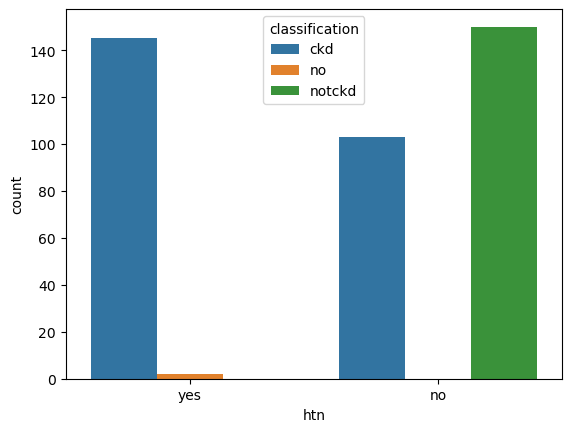

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


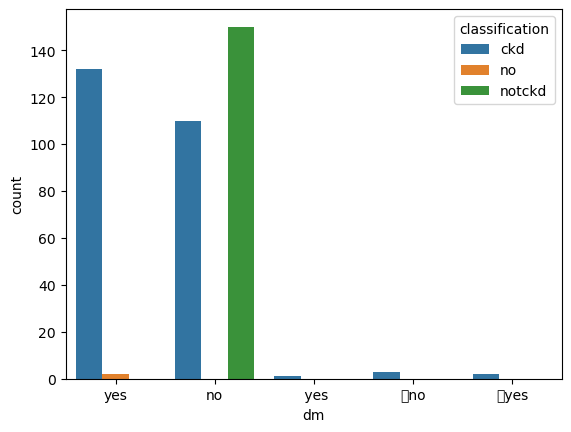

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


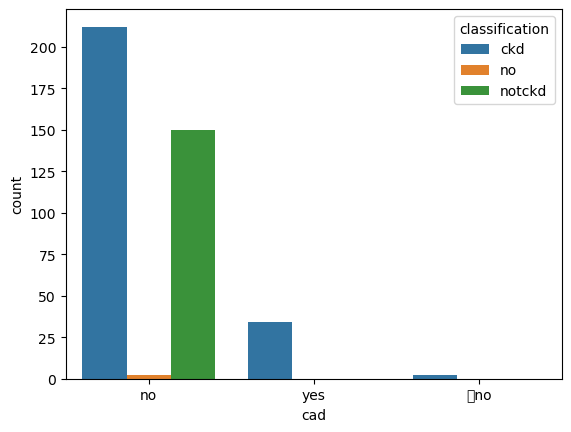

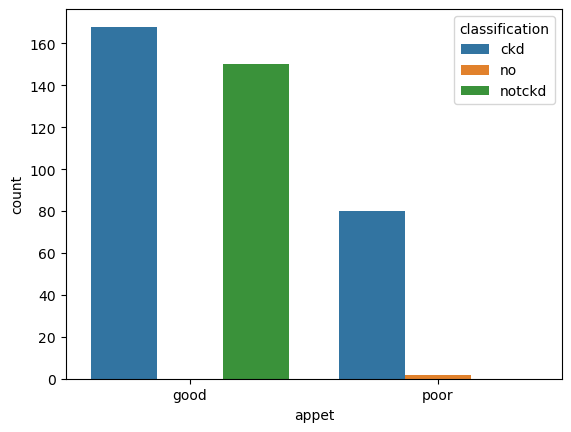

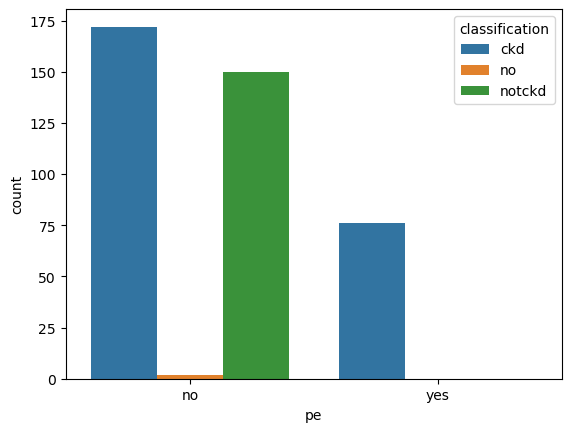

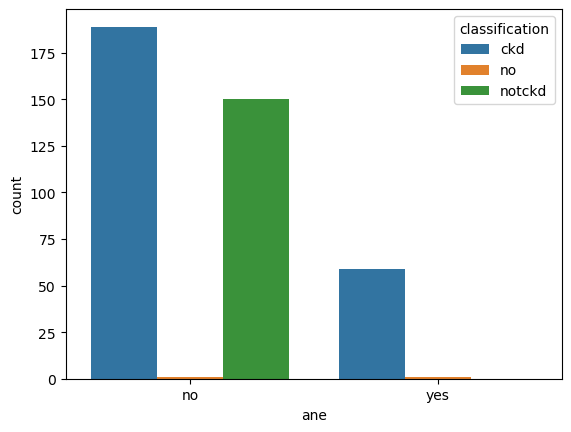

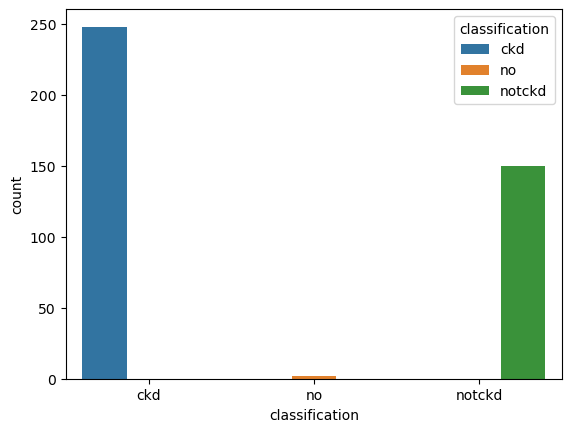

In [26]:
# Create a count plot for each categorical column
for col in categorical_cols:
    sns.countplot(x=col, hue=target_var, data=ckd_data)
    plt.show()

From the above graphs we get to know the common symptoms of having CKD

*   People with poor Appetite(APPET) have developed CKD
*   Patients having CKD have developed ANemia(ANE)
*   People who have developed CKD are also at risk of having Coronary Artery disease(CAD)
*   People having CKD are prone to have Pedal Edema(PE)
*   People having Diabetes Milletus(DE) are at risk of having CKD
*  







In [27]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()
# Encode each categorical column using the LabelEncoder
ckd_data['rbc'] = le.fit_transform(ckd_data['rbc'])
ckd_data['pc'] = le.fit_transform(ckd_data['pc'])
ckd_data['pcc'] = le.fit_transform(ckd_data['pcc'])
ckd_data['ba'] = le.fit_transform(ckd_data['ba'])
ckd_data['htn'] = le.fit_transform(ckd_data['htn'])
ckd_data['dm'] = le.fit_transform(ckd_data['dm'])
ckd_data['cad'] = le.fit_transform(ckd_data['cad'])
ckd_data['appet'] = le.fit_transform(ckd_data['appet'])
ckd_data['pe'] = le.fit_transform(ckd_data['pe'])
ckd_data['classification'] = le.fit_transform(ckd_data['classification'])
ckd_data['ane'] = le.fit_transform(ckd_data['ane'])

**Data Transformation**

We have label encoded the categorical columns using LabelEncoder technique, It is used when the categorical variables have a natural order or hierarchy among their values.
Since the categorical columns have Yes/No or Present/Absent type of values, using label encoding is the most suitable option

In [28]:
#check if categorical columns got encoded
ckd_data.head()

id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...   pcv      wc  \
0   0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  ...  44.0  7800.0   
1   1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  ...  38.0  6000.0   
2   2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  ...  31.0  7500.0   
3   3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  ...  32.0  6700.0   
4   4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  ...  35.0  7300.0   

         rc  htn  dm  cad  appet  pe  ane  classification  
0  5.200000    1   4    1      0   0    0               0  
1  4.707435    0   3    1      0   0    0               0  
2  4.707435    0   4    1      1   0    1               0  
3  3.900000    1   3    1      1   1    1               0  
4  4.600000    0   3    1      0   0    0               0  

[5 rows x 26 columns]

In [29]:
from sklearn.preprocessing import StandardScaler
# Standardize each numerical column using the StandardScaler
# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize multiple columns using the StandardScaler
ckd_data[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']] = scaler.fit_transform(ckd_data[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']])

We have preprocessed the data using Standardscalar. Standardizing (also known as z-score normalization or standardization) scales the data so that it has zero mean and unit variance. It is appropriate when the data has a Gaussian (normal) distribution or when the algorithm being used assumes that the data is normally distributed.

Since the attributes of our dataset are nomrally distributed, we have used standardization

In [30]:
#check if dataset is standardised
ckd_data.head()

id       age        bp        sg        al        su  rbc  pc  pcc  ba  \
0   0 -0.205464  0.254214  0.483355 -0.013338 -0.437797    1   1    0   0   
1   1 -2.623810 -1.972476  0.483355  2.347516 -0.437797    1   1    0   0   
2   2  0.620313  0.254214 -1.381391  0.773613  2.479925    1   1    0   0   
3   3 -0.205464 -0.488016 -2.313764  2.347516 -0.437797    1   0    1   0   
4   4 -0.028511  0.254214 -1.381391  0.773613 -0.437797    1   1    0   0   

   ...       pcv        wc            rc  htn  dm  cad  appet  pe  ane  \
0  ...  0.628372 -0.240519  5.869017e-01    1   4    1      0   0    0   
1  ... -0.108649 -0.954786 -1.058283e-15    0   3    1      0   0    0   
2  ... -0.968506 -0.359563 -1.058283e-15    0   4    1      1   0    1   
3  ... -0.845669 -0.677016 -9.620759e-01    1   3    1      1   1    1   
4  ... -0.477159 -0.438926 -1.280110e-01    0   3    1      0   0    0   

   classification  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 26 columns]

<AxesSubplot:>

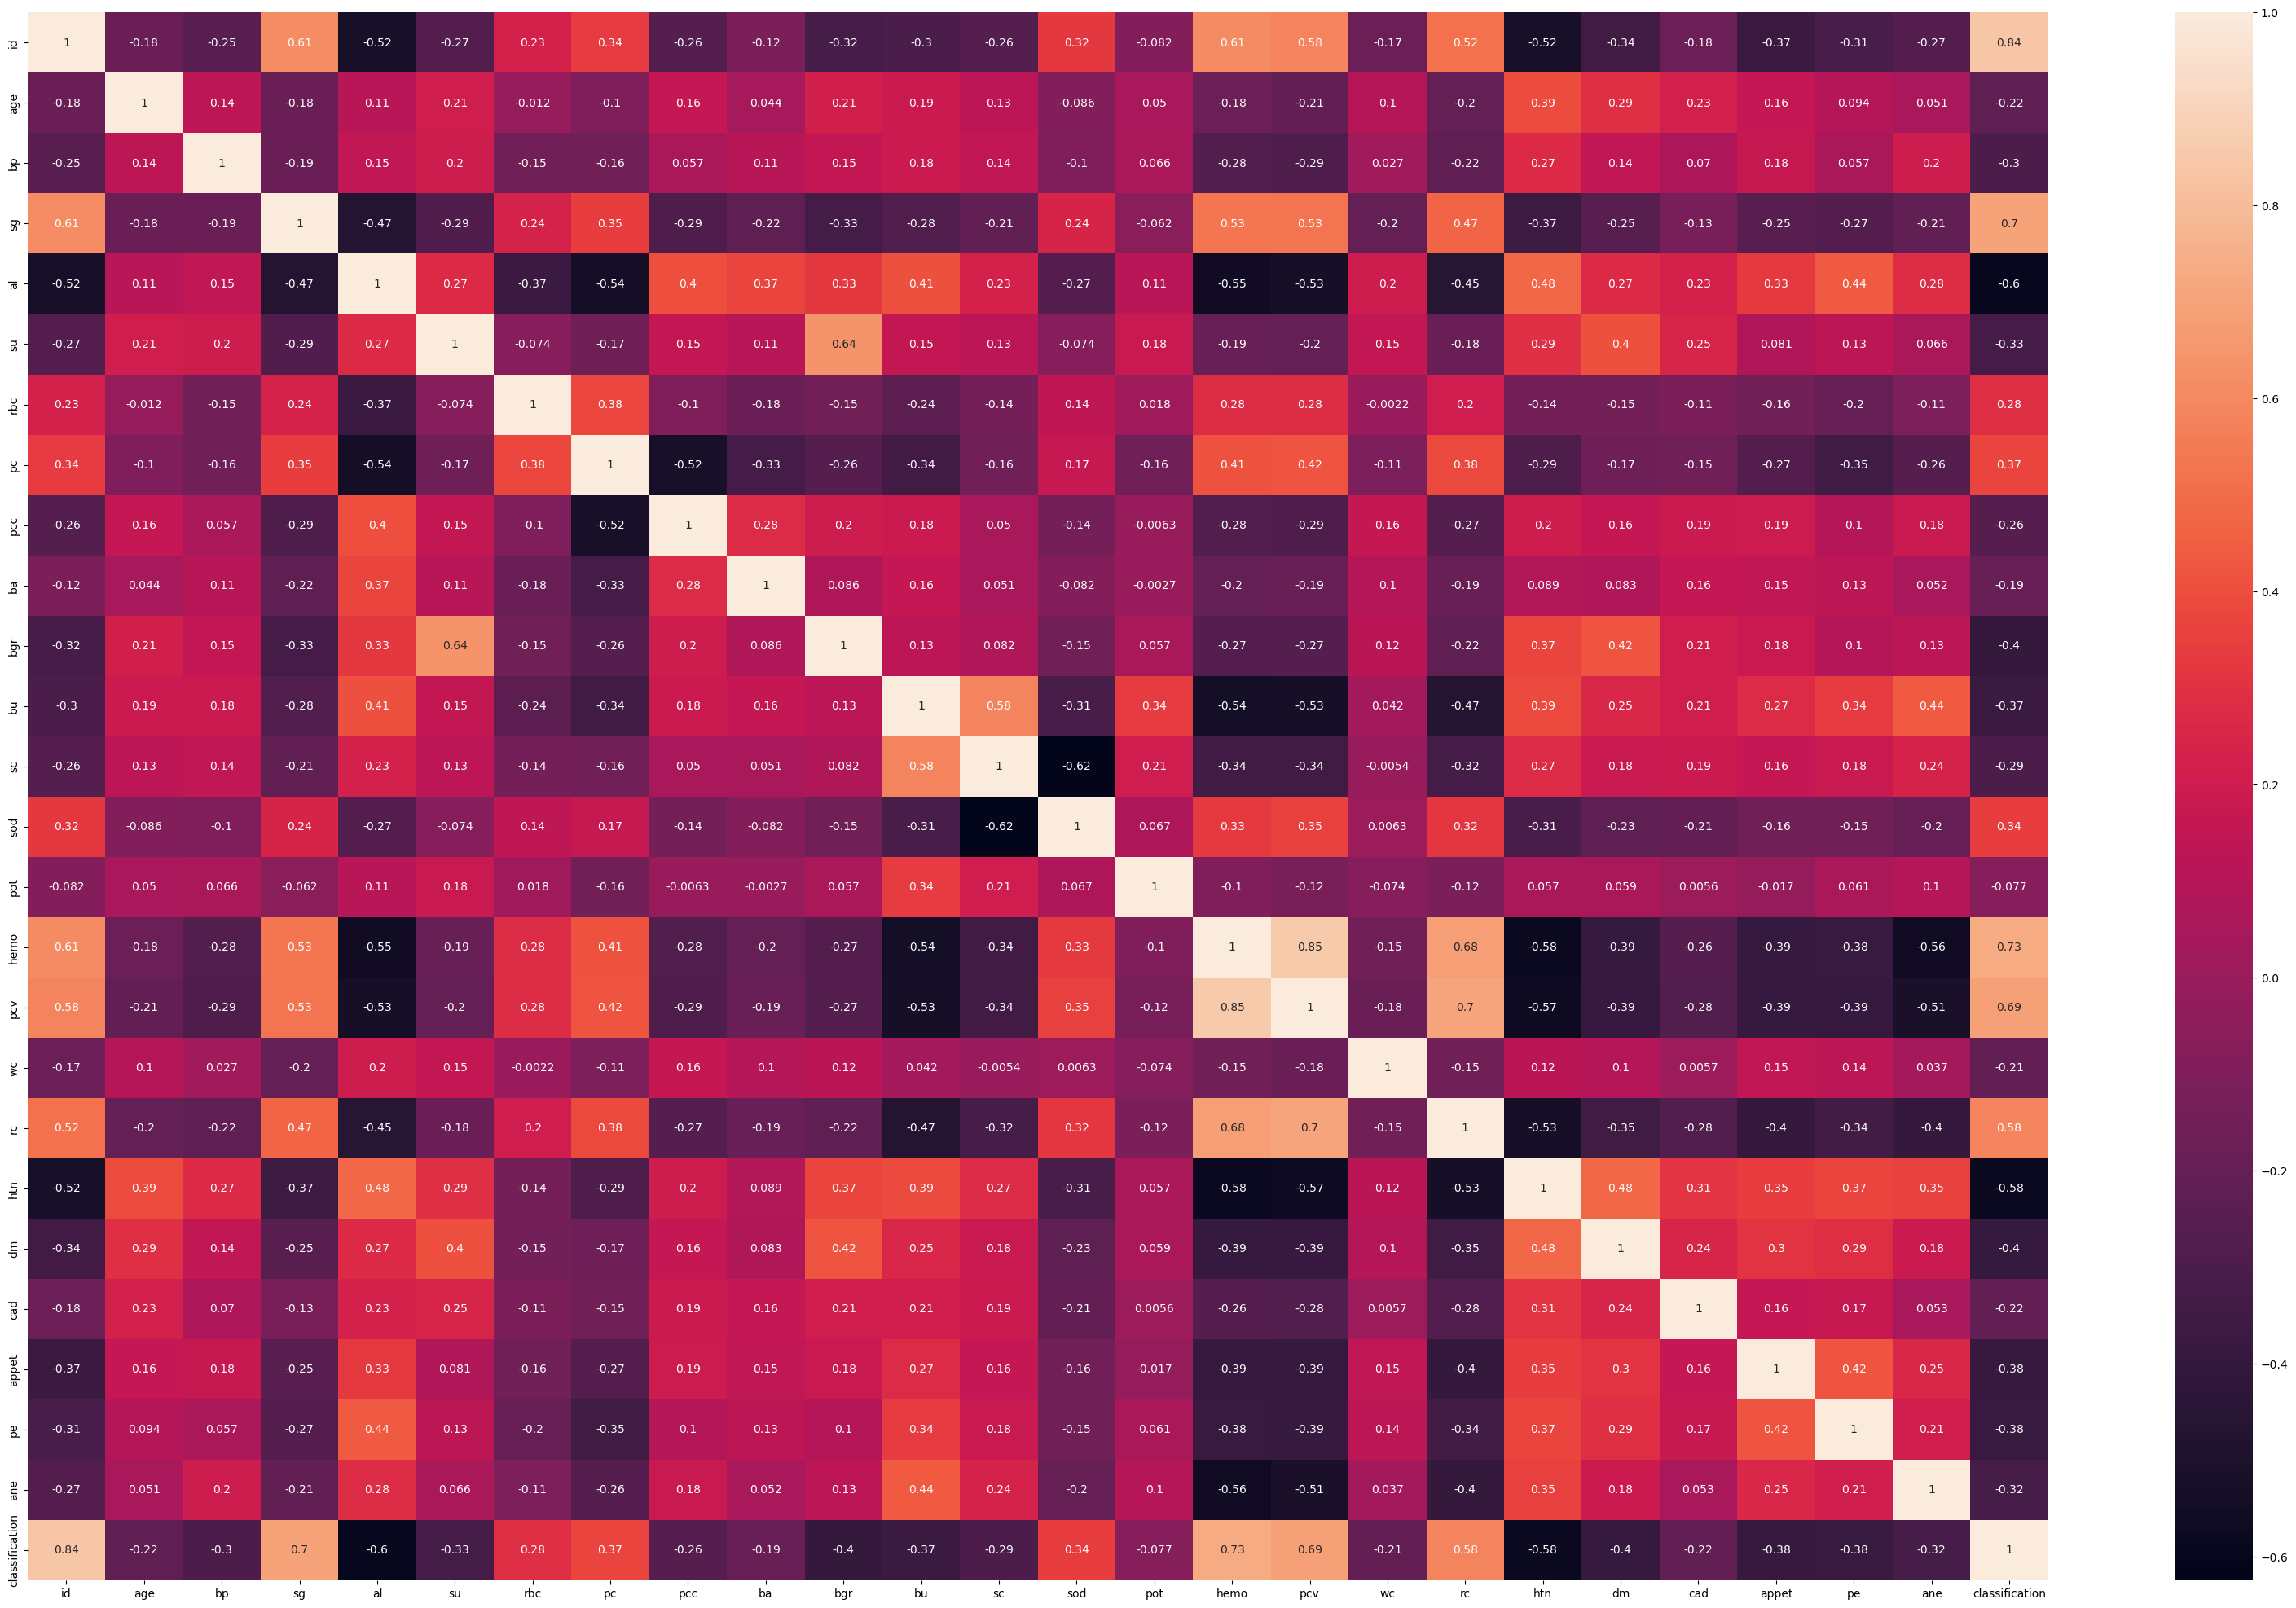

In [31]:
corr = ckd_data.corr()
# Identify correlation between columns
plt.figure(figsize = (40,25))
# visaulising correlation matrix
sns.heatmap(corr, annot=True)

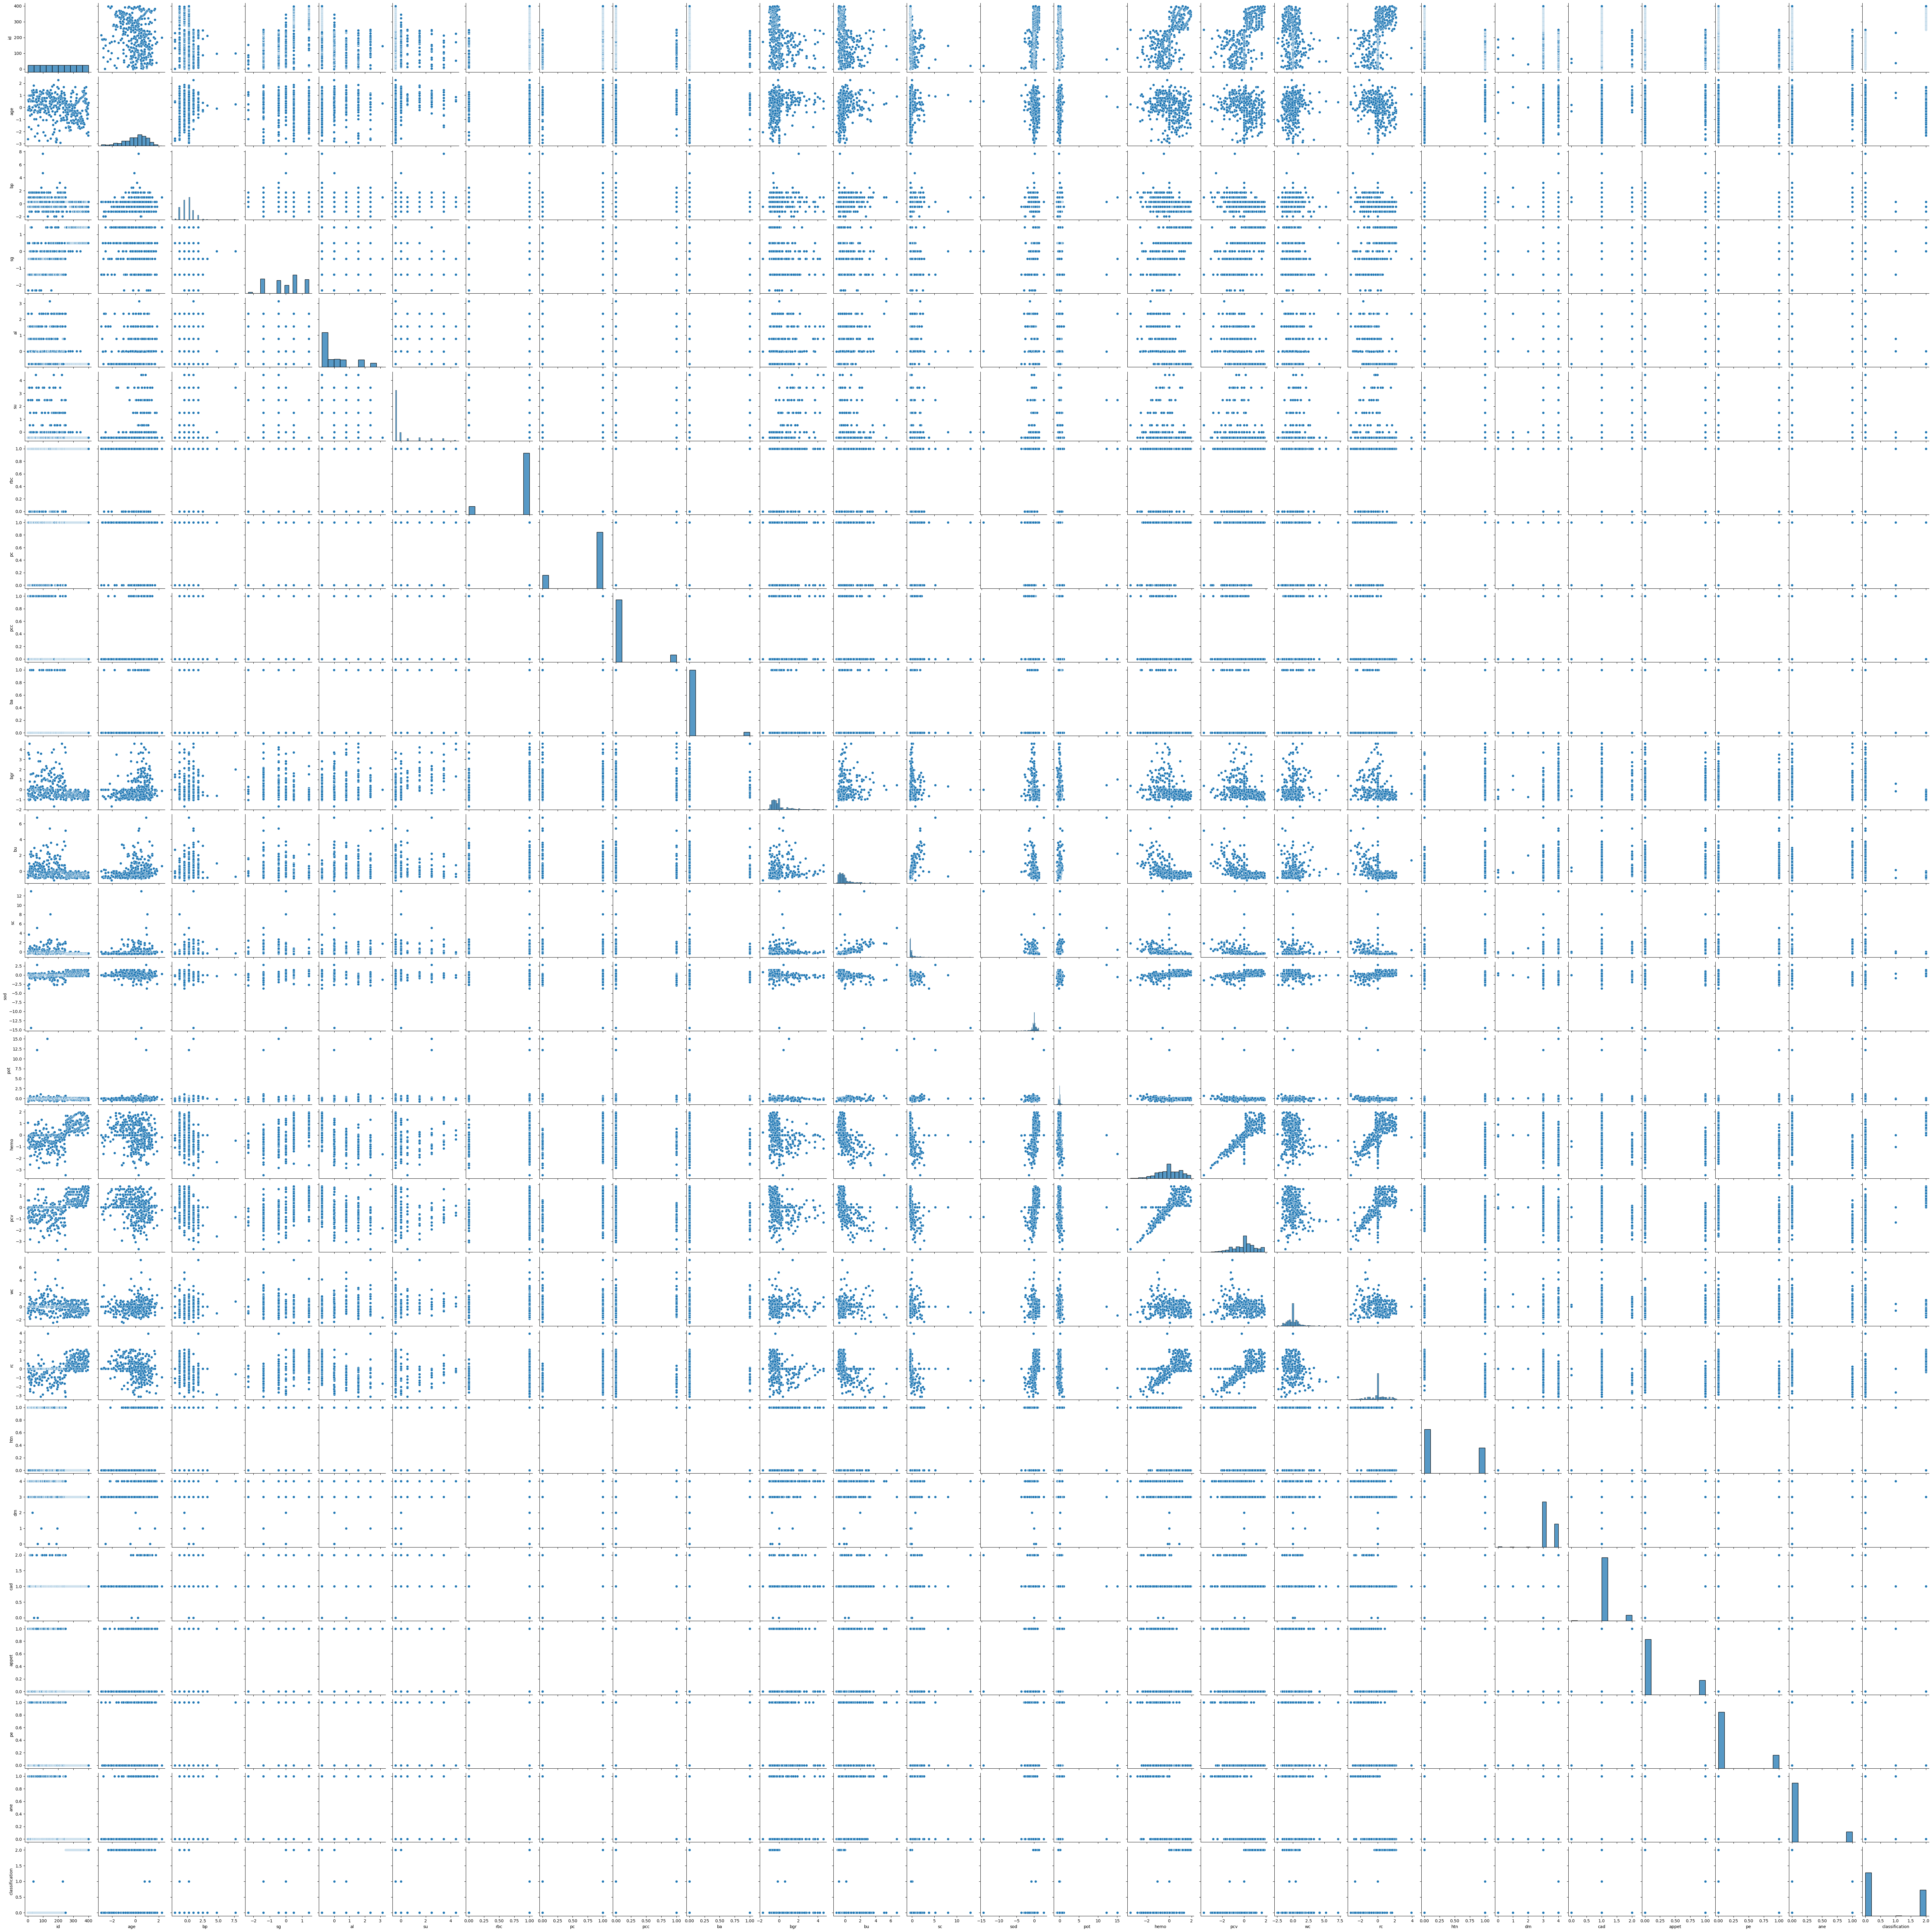

In [32]:
#creating scatterplot for entire dataset
sns.pairplot(ckd_data)

Above correlation matrix and pairplot displays the relationship between each of the attribute of the dataset.
hemo, sg, pcv, al and rc are highly correlated/positively correlated


In [33]:
# Extract the correlations between independent variables and the dependent variable
correlation_with_dependent = corr['classification']

# Sort the correlations in descending order
sorted_correlations = correlation_with_dependent.abs().sort_values(ascending=False)

# Display the attributes in descending order of correlation with the dependent variable
for attribute in sorted_correlations.index:
    correlation_percent = sorted_correlations[attribute] * 100
    print(f'{attribute} and dependent variable = {correlation_percent:.2f}%')




classification and dependent variable = 100.00%
id and dependent variable = 83.67%
hemo and dependent variable = 72.79%
sg and dependent variable = 69.63%
pcv and dependent variable = 68.75%
al and dependent variable = 59.80%
rc and dependent variable = 58.49%
htn and dependent variable = 58.45%
bgr and dependent variable = 40.08%
dm and dependent variable = 39.58%
appet and dependent variable = 38.37%
pe and dependent variable = 37.82%
bu and dependent variable = 37.43%
pc and dependent variable = 37.16%
sod and dependent variable = 34.16%
su and dependent variable = 32.94%
ane and dependent variable = 32.08%
bp and dependent variable = 29.66%
sc and dependent variable = 29.50%
rbc and dependent variable = 28.49%
pcc and dependent variable = 25.90%
age and dependent variable = 22.05%
cad and dependent variable = 21.60%
wc and dependent variable = 20.60%
ba and dependent variable = 18.84%
pot and dependent variable = 7.73%


**Build Decision Tree model on the dataset**

In [34]:
ckd_data['classification'].value_counts()

0    248
2    150
1      2
Name: classification, dtype: int64

In [35]:
#divide data into attributes and labels
X = ckd_data.drop('classification', axis=1)
y = ckd_data['classification']

In [36]:
from sklearn.model_selection import train_test_split

# Assuming X contains the features and y contains the labels/targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The "test_size" parameter specifies the percentage of data to be used for testing.
# The "random_state" parameter ensures that the same random split is obtained every time the code is run.


In [37]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train and y_train are the training set features and targets, respectively
dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)

# The fit() method trains the decision tree classifier on the training data.
# The target variable y_train is assumed to be a 1D array with 3 possible values.


DecisionTreeClassifier()

In [38]:
#make predictions on test data
y_pred_dct = dct.predict(X_test)

In [39]:
#evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_dct))
print(classification_report(y_test, y_pred_dct))

[[51  1  0]
 [ 0  0  0]
 [ 0  0 28]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00        28

    accuracy                           0.99        80
   macro avg       0.67      0.66      0.66        80
weighted avg       1.00      0.99      0.99        80



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred_dct))
print("Precision:", precision_score(y_test, y_pred_dct, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dct, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_dct, average='weighted'))

Accuracy: 0.9875
Precision: 1.0
Recall: 0.9875
F1-score: 0.9936893203883495


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
dt_acc = accuracy_score(y_test, y_pred_dct)
print("Decision tree accuracy:", dt_acc)

Decision tree accuracy: 0.9875


The confusion matrix and evaluation metrics describe the performance of the decision tree model on the test dataset.

*   **Confusion matrix:** This is a table that summarizes the performance of the model by comparing the predicted class labels to the actual class labels. In this case the confusion matrix has 3 rows and 3 columns. Each row corresponds to a true class label, and each column corresponds to a predicted class label. The (i, j)th entry in the matrix indicates the number of data points that belong to the ith true class and were predicted to belong to the jth class. For example, the entry (1, 2) indicates that one data point in the test set belongs to the true class 1, but was predicted to belong to the class 2.
*   **Precision, recall, and F1-score:** These are evaluation metrics that summarize the performance of the model. Precision measures the proportion of predicted positive cases that are actually positive. Recall measures the proportion of actual positive cases that are predicted correctly. F1-score is the harmonic mean of precision and recall, and it is a way to balance the trade-off between the two metrics. In this case, precision and recall are both high for class 0 and 2, indicating that the model is performing well in predicting these classes. However, the precision and recall for class 1 are both zero, which means that the model did not correctly identify any instances of this class.

*   **Support:** This is the number of instances in each true class in the test set.
*   **Accuracy:** This is the proportion of instances in the test set that were classified correctly. In this case, the accuracy is high (0.99), which indicates that the model is performing well overall.


*   **Macro average and weighted average:** that summarize the overall performance of the model across all classes. The macro average calculates the average precision, recall, and F1-score across all classes, without taking into account the size of each class. The weighted average calculates the same metrics, but takes into account the size of each class. In this case, the weighted average precision, recall, and F1-score are high, indicating that the model is performing well overall, but with some weakness in predicting class 1.










**Build Random Forest model on the dataset**

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X_train, y_train are the training data features and targets, respectively
rfc = RandomForestClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 50}
Best score: 0.99375


The above code performs hyperparameter tuning for a random forest classifier using grid search cross-validation. The goal is to find the best combination of hyperparameters (n_estimators, max_depth, and min_samples_leaf) that optimize the classifier's performance on the given training data.

The grid search creates a set of hyperparameter combinations based on the specified values in param_grid and evaluates each combination using cross-validation with 5 folds.

The best combination of hyperparameters is then chosen based on the highest mean score obtained during the cross-validation. Finally, the code prints the best hyperparameters and the corresponding score.

In [43]:
# Assuming X_train, y_train, X_test, and y_test are the training and testing data
# features and targets, respectively
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=1)
rfc.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_rfc = rfc.predict(X_test)

In [44]:
#evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[52  0]
 [ 0 28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Precision:", precision_score(y_test, y_pred_rfc, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rfc, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_rfc, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [46]:
rf_acc = accuracy_score(y_test, y_pred_rfc)
print("Random forest accuracy:", rf_acc)

Random forest accuracy: 1.0


The confusion matrix shows that the model correctly predicted all instances with label 0(CKD) and 27 out of 27 instances with label 2(notCKD). However, the model was not able to correctly predict any instances with label 1(NO)

The precision for label 0 is 1.00, meaning that all instances predicted as label 0 are actually label 0. However, the precision for label 1 is 0.00, meaning that all instances predicted as label 1 are actually not label 1. The precision for label 2 is 0.96, meaning that 96% of instances predicted as label 2 are actually label 2.

The recall for label 0 and label 2 is 1.00, meaning that the model correctly identified all instances with label 0 and label 2. However, the recall for label 1 is 0.00, meaning that the model did not correctly identify any instances with label 1.

The f1-score is a weighted average of the precision and recall for each label. It ranges between 0 and 1, with a value of 1 indicating perfect precision and recall. The weighted average f1-score is 0.98, indicating that the model is performing well on the overall dataset.

The accuracy of the model is 0.99, which means that the model correctly classified 99% of the instances in the dataset.

In summary, the model is performing well for labels 0 and 2, but is not able to correctly predict any instances with label 1. The overall accuracy and f1-score are high, but this may be misleading given the imbalance in the number of instances for each label.

In [47]:
# Compare performance of decision tree and random forest models
if rf_acc > dt_acc:
    print("Random forest outperforms decision tree")
else:
    print("Decision tree outperforms random forest")

Random forest outperforms decision tree


Based on the generated results, both decision tree and random forest models seem to perform equally well on the given dataset with an accuracy of 0.99.

However, both models are not able to predict the instances of class 1, as the precision, recall, and f1-score values for this class are 0. This may indicate that the dataset is imbalanced, with a small number of instances in class 1, which can result in poor performance for this class.

It is also worth noting that the macro-average values for precision, recall, and f1-score are lower than the weighted average values. This suggests that the imbalanced class distribution is affecting the model's performance, particularly for the minority class.

But since we only have 1 instance of class 1(NO) in the dataset, then it is difficult to evaluate the model's performance for that class. In this case, it may be reasonable to exclude that class from the evaluation and focus on the performance of the model for the other classes.

If we exclude class 1, then the performance of the models can be evaluated using the precision, recall, and f1-score metrics for classes 0 and 2. Based on the provided results, both models achieve very high accuracy, precision, recall, and f1-score for classes 0 and 2. The performance metrics suggest that the models are able to accurately predict the instances of classes 0 and 2.